In [76]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [77]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

RGB


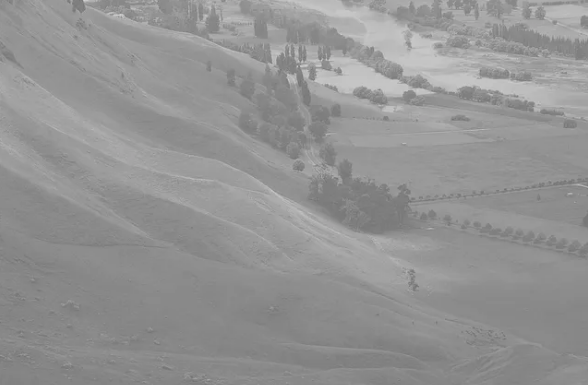

In [78]:
widok = Image.open('widok.png')
print(widok.mode)
widok

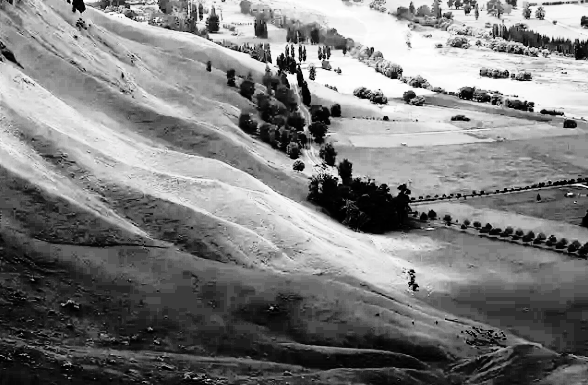

In [79]:
widok_equalized = ImageOps.equalize(widok, mask = None)
widok_equalized 

In [80]:
im = Image.open('brain.png')
print(im.mode)
print(im.size)
statystyki(im)

RGBA
(352, 326)
extrema  [(0, 255), (0, 255), (0, 255), (255, 255)]
count  [114752, 114752, 114752, 114752]
mean  [64.40476854433909, 64.40476854433909, 64.40476854433909, 255.0]
median  [68, 68, 68, 255]
stddev  [45.56588189784377, 45.56588189784377, 45.56588189784377, 0.0]


In [81]:
szary = im.convert('L')
print(szary.mode)
print(szary.size)
statystyki(szary)

L
(352, 326)
extrema  [(0, 255)]
count  [114752]
mean  [64.40476854433909]
median  [68]
stddev  [45.56588189784377]


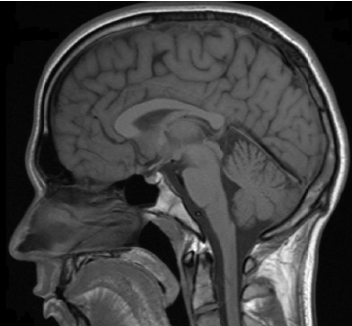

In [82]:
szary

<BarContainer object of 256 artists>

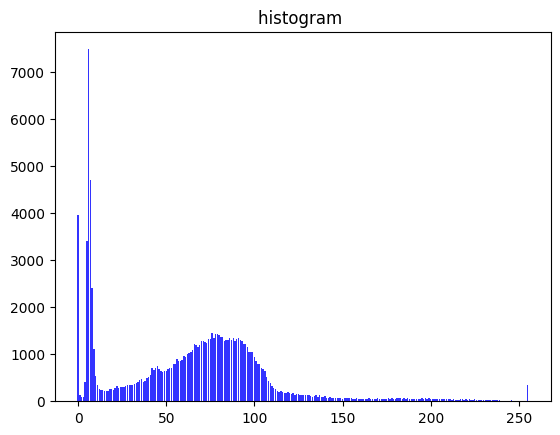

In [83]:
hist = szary.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

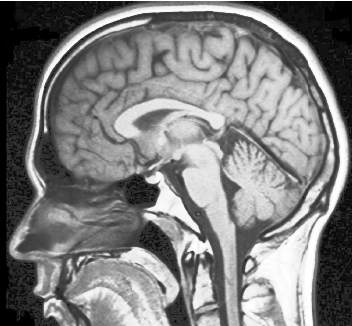

In [84]:
im_equalized1 = ImageOps.equalize(szary, mask = None)
im_equalized1

<BarContainer object of 256 artists>

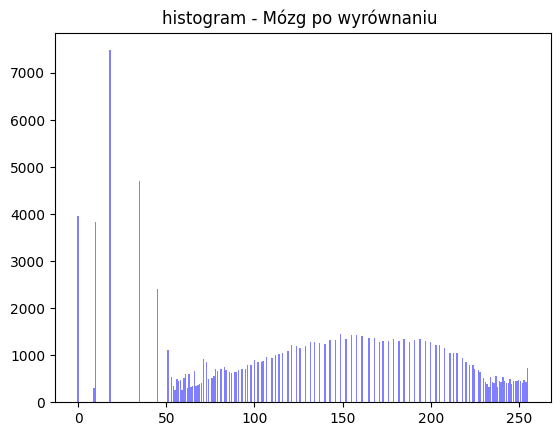

In [85]:
hist = im_equalized1.histogram()
plt.title("histogram - Mózg po wyrównaniu ")
plt.bar(range(256), hist[:], color='b', alpha=0.5)

# wyrównanie histogramu - funkcje własne

In [86]:
def histogram_norm(im):  # normalizacja histogramu
    hist = im.histogram()
    w, h = im.size #
    N = w * h # mozna zastapić przez stat.Stat(im).count
    hist_norm = []
    for item in hist:
        hist_norm.append(item / N)
    return hist_norm

def histogram_cumul(histogram):  # pl_norm - histogram znormalizowany,  na wyjsciu histogram skumulowany
    hist_cumulative = [histogram[0]]
    for i in range(1, len(histogram)):
            hist_cumulative.append(hist_cumulative[i - 1] + histogram[i])
    return hist_cumulative


def histogram_equalization(im): # im -obraz w trybie "L", na wyjściu obraz, którego histogram jest wyrównany
    hist_norm = histogram_norm(im)
    hist_cumulative = histogram_cumul(hist_norm)
    im1 = im.point(lambda i:  int(255 * hist_cumulative[i]))
    return im1

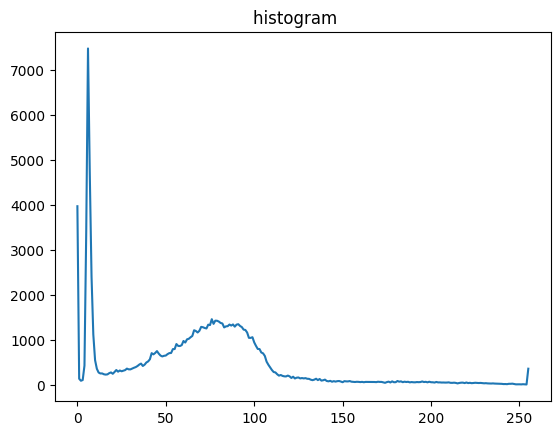

In [87]:
hist = szary.histogram()
plt.title("histogram   ")
plt.plot(hist)
plt.show()



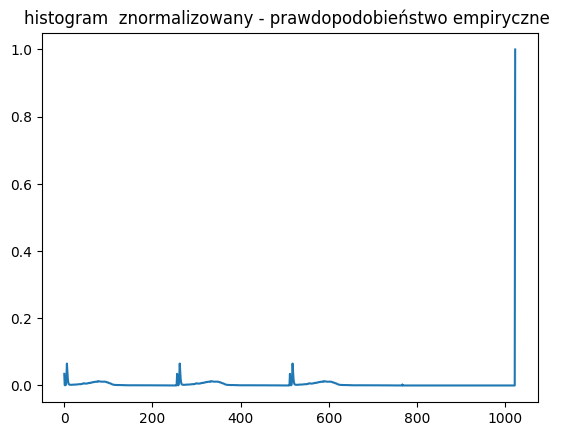

In [88]:

hist_norm = histogram_norm(im)
plt.title("histogram  znormalizowany - prawdopodobieństwo empiryczne ")
plt.plot(hist_norm)
plt.show()



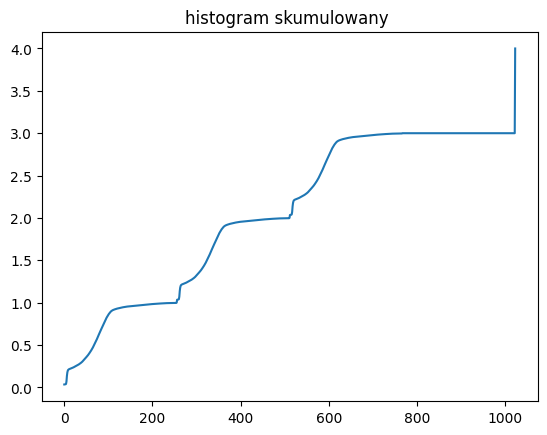

In [89]:
hist_cumulative = histogram_cumul(hist_norm)
plt.title("histogram skumulowany ")
plt.plot(hist_cumulative)
plt.show()

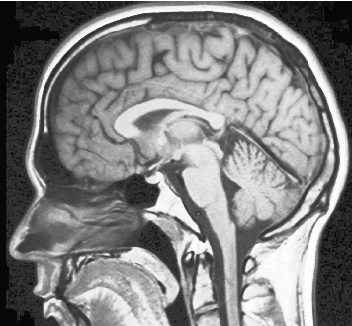

In [90]:
im_equalized2 = histogram_equalization(szary)
im_equalized2

<BarContainer object of 256 artists>

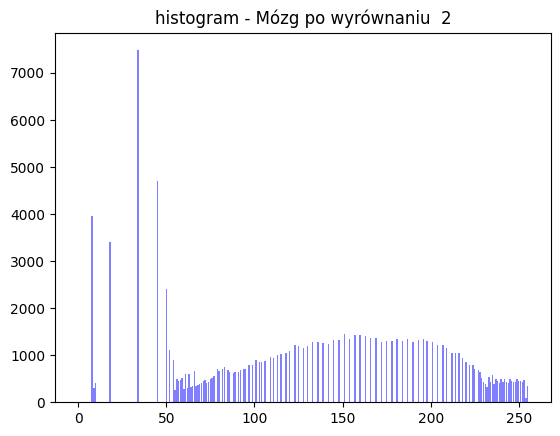

In [91]:
hist_eq = im_equalized2.histogram()
plt.title("histogram - Mózg po wyrównaniu  2")
plt.bar(range(256), hist_eq[:], color='b', alpha=0.5)

In [92]:
diff=ImageChops.difference(im_equalized1, im_equalized2)
statystyki(diff)

extrema  [(0, 16)]
count  [114752]
mean  [3.0030500557724484]
median  [1]
stddev  [4.232824424019678]


## Wyrównanie obrazów w trybie RGB

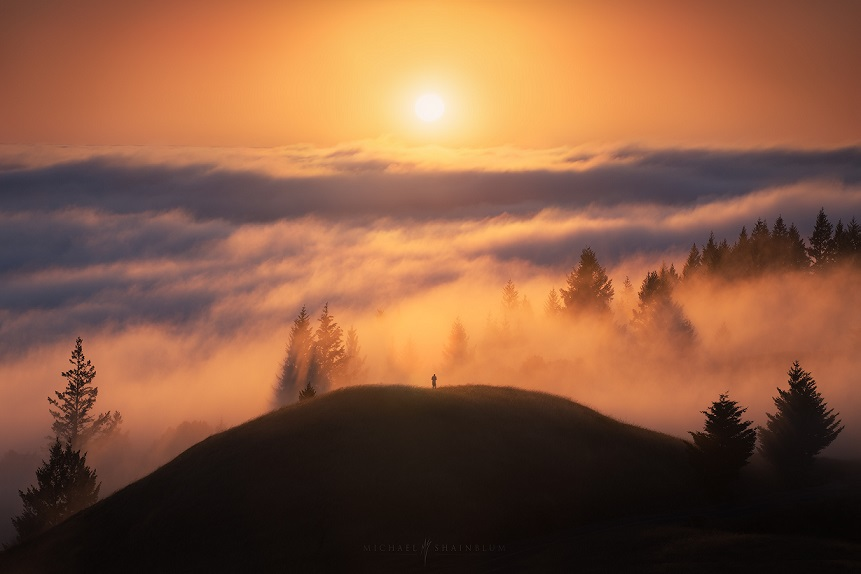

In [93]:
im = Image.open('mgla.jpg') # obraz kolorowy
im


extrema  [(5, 255), (0, 244), (0, 240)]
count  [494214, 494214, 494214]
mean  [136.95908452613645, 90.40623495085126, 63.51917388014099]
median  [149, 91, 73]
stddev  [83.18721585413134, 56.8894532947344, 35.732913863973245]


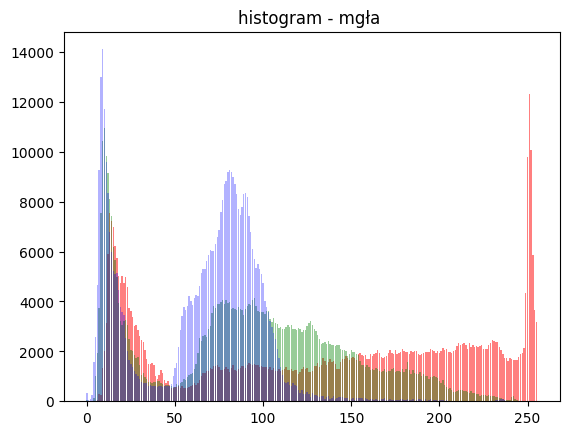

In [94]:
statystyki(im)
hist = im.histogram()
plt.title("histogram - mgła ")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

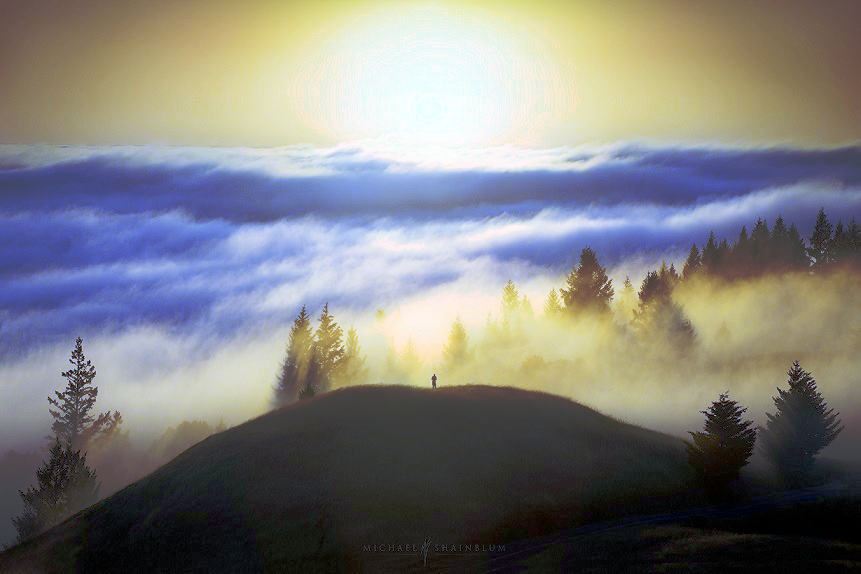

In [95]:
r, g, b = im.split()
# wyrównanie każdego kanału oddzielnie
r_eq = ImageOps.equalize(r)
g_eq = ImageOps.equalize(g)
b_eq = ImageOps.equalize(b)
im1 = Image.merge('RGB', (r_eq, g_eq, b_eq))
im1

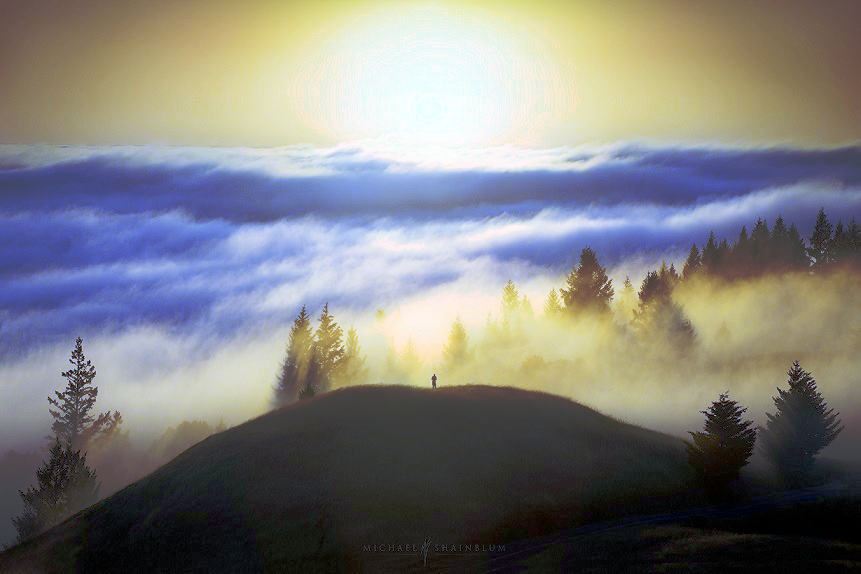

In [96]:
# wyrównaie obrazu RGB
im_equalized1 = ImageOps.equalize(im, mask=None)
im_equalized1

extrema  [(0, 255), (0, 255), (0, 255)]
count  [494214, 494214, 494214]
mean  [127.56359390871161, 126.69678115148498, 125.91618205878426]
median  [128, 126, 125]
stddev  [74.04443163783701, 74.05644815560801, 73.78911379717243]


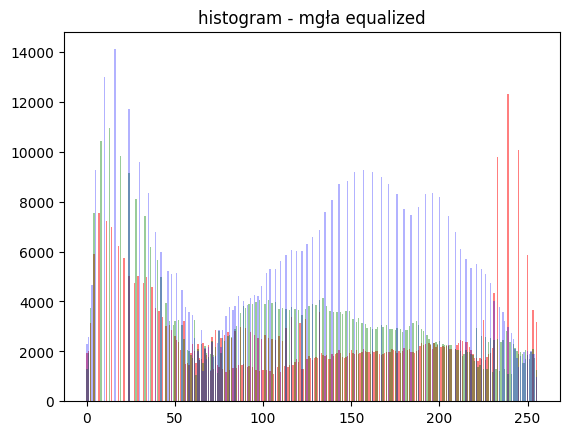

In [97]:
statystyki(im_equalized1)
hist = im_equalized1.histogram()
plt.title("histogram - mgła equalized")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

In [98]:
# dowód, że ImageOps.equalize(im) na obrazie RGB działa tak samo jak wyrównanie kazdego kanału oddzielnie i scalenie
diff=ImageChops.difference(im_equalized1, im1)
statystyki(diff)

extrema  [(0, 0), (0, 0), (0, 0)]
count  [494214, 494214, 494214]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


konwersja RGB na L

L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [100]:
im = Image.open('baby_yoda.jpg') # obraz RGB
r, g, b = im.split()
r_T = np.array(r)
g_T = np.array(g)
b_T = np.array(b)

# konwersja na  obraz w odcieniach szarości- nieudane podejscie
# nie stosować tej metody w zadaniu 4 !!!
w1 = 0.299
w2 = 0.587
w3 = 0.114
szary = w1 * r_T + w2 * g_T + w3 * b_T
szary_im = Image.fromarray(szary)
print(szary_im.mode) # tryb 'F'
szary_im.show()
# szary_im.save('szary_yoda.png') # pojawi się błąd OSError: cannot write mode F as PNG


F
